Shor Simulation
===


In [1]:
import shor

import math
import random
import numpy as np
import matplotlib.pyplot as plt

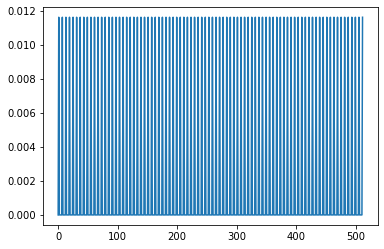

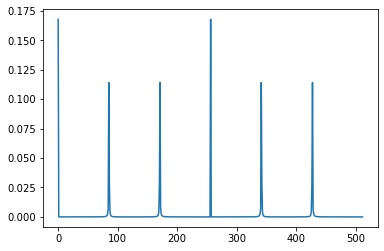

In [2]:
p = np.empty(512, dtype=np.double)
for k in range(512):
    if (k-1) % 6 == 0:
        p[k] = 1/86
    else:
        p[k] = 0
        
plt.plot(p)
plt.show()

p = shor.DFT(p, 512)
plt.plot(p)
plt.show()

In [3]:
N = int(input("N: "))
x = int(input("x: "))
n = math.ceil(math.log2(N))
t = math.floor(2 * math.log2(N)) + 1

n_states = 2 ** t
measured = 1
QReg = {"n_states": n_states,
        "prob": np.empty(n_states, dtype=np.double)}

N: 21
x: 2


In [4]:
def phi_0(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    
    prob[0] = 1
    for j in range(1, n_states):
        prob[j] = 0

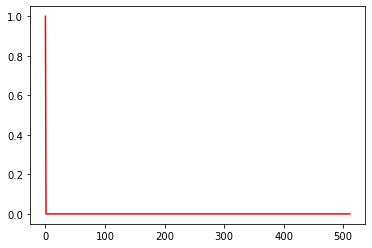

In [5]:
phi_0(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()

In [6]:
def phi_1(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    
    for j in range(n_states):
        prob[j] = 1 / n_states

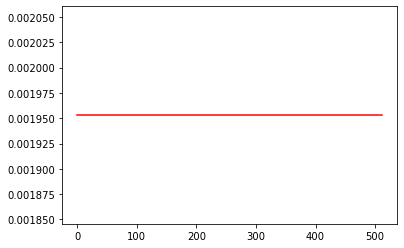

In [7]:
phi_1(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()

In [8]:
def phi_2(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    freq_powers = np.zeros(N, dtype=np.double)
    for j in range(n_states):
        power = shor.power_mod(x, j, N)
        freq_powers[power] += prob[j]
    return freq_powers

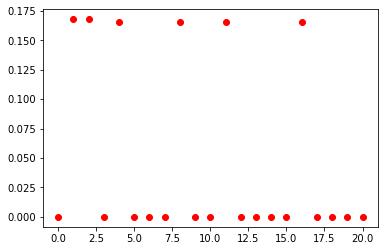

In [9]:
freq_powers = phi_2(QReg)
plt.plot(freq_powers, 'ro')
plt.show()

In [10]:
def phi_3(reg):
    n_states = reg["n_states"]
    prob = reg["prob"]
    
    x_b = shor.power_mod(x, measured, N)
    
    cnt = 0
    for j in range(n_states):
        if x_b == shor.power_mod(x, j, N):
            cnt += 1
    
    for j in range(n_states):
        if x_b == shor.power_mod(x, j, N):
            prob[j] = 1 / cnt
        else:
            prob[j] = 0

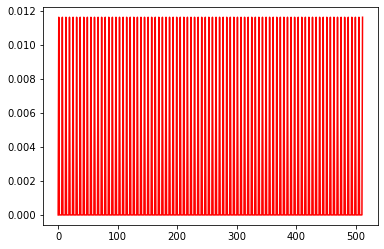

In [11]:
phi_3(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()

In [12]:
def phi_4(reg):
    n_states = reg["n_states"]
    reg["prob"] = shor.DFT(reg["prob"], n_states)

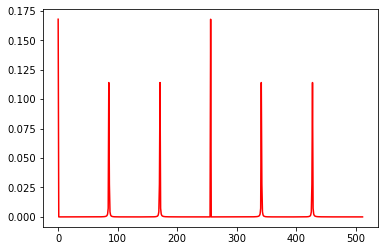

In [13]:
phi_4(QReg)
plt.plot(QReg["prob"], 'r')
plt.show()